<a href="https://colab.research.google.com/github/Vincenzo-Miracula/MasterSDS/blob/main/reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 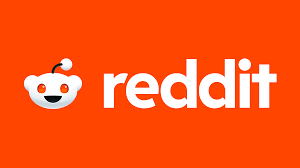


https://www.reddit.com/

### 1. Importazione delle Librerie
Il codice utilizza diverse librerie:
- **PRAW**: Per interagire con l'API di Reddit e accedere ai thread e ai commenti.
- **json**: Per salvare i dati estratti in un file JSON.
- **datetime**: Per convertire i timestamp UNIX in un formato leggibile.
- **pandas**: Per organizzare i dati in un DataFrame.
- **configparser**: Per leggere configurazioni da un file `config.ini`.

### 2. Lettura del File di Configurazione
Il file `config.ini` viene letto tramite la libreria `configparser`. Questo file contiene i seguenti parametri:
- `client_id`, `client_secret`, `user_agent`: Credenziali necessarie per autenticarsi all'API di Reddit.

Questi parametri vengono utilizzati per creare un'istanza `praw.Reddit` che permette di interagire con Reddit.

### 3. Scelta del Thread Reddit
Il codice specifica l'URL di un thread Reddit. Questo thread è caricato nell'oggetto `submission` tramite il metodo `reddit.submission(url=thread_url)`. L'oggetto `submission` consente di accedere a informazioni come:
- L'autore del thread.
- Il testo del thread.
- La data di creazione.
- I commenti.

### 4. Conversione del Timestamp
Una funzione personalizzata, `convert_timestamp`, converte i timestamp UNIX in un formato leggibile (`YYYY-MM-DD HH:MM:SS`). Questo è utile per visualizzare in modo comprensibile le date di creazione del thread e dei commenti.

### 5. Creazione del Dizionario per il Thread
Le informazioni principali del thread vengono salvate in un dizionario chiamato `thread_data`, che contiene:
- **Autore del thread**: Nome dell'utente che ha creato il thread.
- **Testo del thread**: Contenuto principale del post.
- **Data**: Data di creazione del thread (in formato leggibile).

### 6. Estrazione dei Commenti
Il metodo `submission.comments.replace_more(limit=None)` assicura che tutti i commenti del thread, inclusi quelli inizialmente omessi, vengano caricati. I commenti vengono quindi estratti tramite `submission.comments.list()`.

### 7. Elaborazione dei Commenti
Per ogni commento, il codice crea un dizionario contenente:
- **Autore del thread**: Nome dell'autore del thread (ripetuto per riferimento).
- **Testo del thread**: Contenuto del thread (ripetuto per riferimento).
- **Data**: Data di creazione del commento (convertita in formato leggibile).
- **Autore del commento**: Nome dell'utente che ha scritto il commento.
- **Testo del commento**: Contenuto del commento.

Questi dati vengono aggiunti alla lista dei commenti nel dizionario `thread_data`.

### 8. Conversione in DataFrame
La lista dei commenti estratti viene organizzata in una struttura tabellare (`DataFrame`) utilizzando la libreria `pandas`. Questo rende i dati più facili da analizzare e manipolare.

### 9. Salvataggio in Formato JSON
L'intero dizionario `thread_data`, che include i dettagli del thread e i commenti, viene salvato in un file JSON (`thread_data.json`) per utilizzi futuri o ulteriori analisi.

### Riassunto del Flusso
1. Lettura delle credenziali dal file `config.ini`.
2. Connessione all'API di Reddit tramite `praw.Reddit`.
3. Estrazione dei dettagli del thread (autore, testo, data).
4. Caricamento e iterazione sui commenti del thread.
5. Organizzazione dei dati in un dizionario strutturato.
6. Salvataggio dei dati in un file JSON e in un `DataFrame pandas`.




------



In [ ]:
!pip install praw

In [2]:
import praw
import json
from datetime import datetime
import pandas as pd
import configparser

In [ ]:
config = configparser.ConfigParser()
config.read('config.ini')

In [ ]:
config['reddit']['user_agent']

In [27]:
# Creazione istanza
reddit = praw.Reddit(
    client_id= config['reddit'] ['client_id'],
    client_secret= config['reddit']['client_secret'],
    user_agent= config['reddit']['user_agent'],
    check_for_async=False
)

In [48]:
# URL del thread da analizzare
thread_url = "https://www.reddit.com/r/trump/comments/1gkyeec/a_democrat_here_congratulations_for_the_win/"
submission = reddit.submission(url=thread_url)

In [53]:
submission.comments.replace_more(limit=None)
comments = submission.comments.list()

In [ ]:
for comment in comments:
  print(comment.author)

# resto del codice

In [44]:
def convert_timestamp(unix_timestamp):
    return datetime.utcfromtimestamp(unix_timestamp).strftime('%Y-%m-%d %H:%M:%S')

In [56]:
# Creazione del dizionario per salvare i dati
thread_data = {
    "thread": {
        "author": str(submission.author),
        "text": submission.selftext,
        "date": convert_timestamp(submission.created_utc),
    },
    "comments": []
}

In [57]:
for comment in comments:
    comment_data = {
        "author_thread": thread_data["thread"]["author"],
        "text_thread": thread_data["thread"]["text"],
        "date": convert_timestamp(comment.created_utc),
        "author": str(comment.author),
        "text": comment.body
    }
    thread_data["comments"].append(comment_data)

# Ora, thread_data è un dizionario che contiene tutti i dati
# Possiamo trasformare i dati dei commenti in un DataFrame

comments_data = thread_data["comments"]

In [58]:
df = pd.DataFrame(comments_data)

# Salviamo il dizionario in un file JSON per eventuali utilizzi successivi
with open("thread_data.json", "w") as json_file:
    json.dump(thread_data, json_file, indent=4)

In [ ]:
df

In [ ]:
df.iloc[:]#, 1:]